In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.Prepare Data

#### Load datasets


In [9]:
train=pd.read_csv('D:/kaggle/titanic/train.csv')
test=pd.read_csv('D:/kaggle/titanic/test.csv')
full_data = pd.concat([train, test], ignore_index=True, sort  = False)


In [98]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SameTicket,FarePerPerson,Surname,Emb_C,Emb_Q,Emb_S,SameSurname,SameCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,NaN,S,1,3.625000,Braund,0,0,1,2,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,C85,C,1,35.641650,Cumings,1,0,0,1,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.925000,Heikkinen,0,0,1,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,C123,S,2,26.550000,Futrelle,0,0,1,2,2.0
4,5,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,NaN,S,1,8.050000,Allen,0,0,1,2,NaN
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,1,8.458300,Moran,0,1,0,3,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00,0,0,17463,51.8625,E46,S,1,51.862500,McCarthy,0,0,1,1,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00,3,1,349909,21.0750,NaN,S,4,5.268750,Palsson,0,0,1,4,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00,0,2,347742,11.1333,NaN,S,3,3.711100,Johnson,0,0,1,6,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00,1,0,237736,30.0708,NaN,C,2,15.035400,Nasser,1,0,0,2,NaN


### Show statistics

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Let's take a look at object columns

#### Ticket. One can observe that persons with same tickets have a big correlation of survivng.

In [17]:
train.Ticket.describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [21]:
train[train.Ticket=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


#### The same goes for Cabin.

In [23]:
train.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [24]:
train[train.Cabin=='B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


#### Embarked.

In [26]:
train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

## New features

#### One can observe that fare goes for ticket not for person. But it seems to be more logical if we use fare per person.

In [10]:
train['SameTicket'] = train.groupby('Ticket')['Ticket'].transform('size')

test['SameTicket'] = test.groupby('Ticket')['Ticket'].transform('size')

full_data['SameTicket'] = full_data.groupby('Ticket')['Ticket'].transform('size')

In [45]:
test.SameTicket.describe()

count    418.000000
mean       1.349282
std        0.757069
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: SameTicket, dtype: float64

#### But for most passengers ticket is NaN. In that cases we can't 100% distinguish if ticket is single or not. Let's assume that in that cases FarePerPerson=Fare/(1+SibSp+Parch)

In [11]:
FPP = lambda fare, sibsp, parch, sameticket  : (fare/sameticket) if sameticket>1 else fare/(sibsp+parch+1)
train['FarePerPerson'] = train.apply(lambda x: FPP(x.Fare, x.SibSp,x.Parch,x.SameTicket), axis=1)
test['FarePerPerson'] = test.apply(lambda x: FPP(x.Fare, x.SibSp,x.Parch,x.SameTicket), axis=1)
full_data['FarePerPerson'] = full_data.apply(lambda x: FPP(x.Fare, x.SibSp,x.Parch,x.SameTicket), axis=1)
    

###### But we ignore cases when tickets of the same group are actually NaN!

In [62]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SameTicket,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500


### Now what about chances of surviving inside one group (ticket/cabin/family/embarked)

In [13]:
for_join_train_1=train[(train.SameTicket>1)&(train.Survived==1)].groupby('Ticket').size().copy()
for_join_train = pd.Series.to_frame(for_join_train_1,name="Survived_by_Tickets")

'''
for_join_test_1=test[(test.SameTicket>1)&(test.Survived==1)].groupby('Ticket').size().copy()
for_join_test = pd.Series.to_frame(for_join_test_1,name="Survived_by_Tickets")

for_join_fd_1=full_data[(full_data.SameTicket>1)&(full_data.Survived==1)].groupby('Ticket').size().copy()
for_join_fd = pd.Series.to_frame(for_join_fd_1,name="Survived_by_Tickets")
'''

In [15]:
train_merged=train.merge(for_join_train,how='left', on='Ticket')
train_merged['Survived_by_Tickets'][train_merged.SameTicket>1] = train_merged['Survived_by_Tickets'][train_merged.SameTicket>1].fillna(0).copy()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
train_merged['Survived_same_ticket']=train_merged['Survived_by_Tickets']/train_merged['SameTicket']

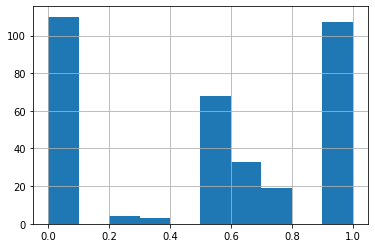

In [17]:
train_merged['Survived_same_ticket'].hist()

#### Split names

In [21]:
train_merged['Surname'] = train_merged.Name.apply(lambda name: name.split(',')[0].strip())

In [23]:
train['Surname'] = train.Name.apply(lambda name: name.split(',')[0].strip())
test['Surname'] = test.Name.apply(lambda name: name.split(',')[0].strip())
full_data['Surname'] = full_data.Name.apply(lambda name: name.split(',')[0].strip())

#### Transform sex into [0,1]

In [31]:
train['Sex']=np.where(train['Sex']=='female',0,1)
test['Sex']=np.where(test['Sex']=='female',0,1)
full_data['Sex']=np.where(full_data['Sex']=='female',0,1)

#### Embarked into dummies

In [33]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)
test.Embarked.fillna(test.Embarked.mode()[0], inplace = True)
full_data.Embarked.fillna(full_data.Embarked.mode()[0], inplace = True)

In [48]:
train=pd.concat([train,pd.get_dummies(train.Embarked, prefix="Emb")],axis=1)
test=pd.concat([test,pd.get_dummies(test.Embarked, prefix="Emb")],axis=1)
full_data=pd.concat([full_data,pd.get_dummies(full_data.Embarked, prefix="Emb")],axis=1)

#### Group by same surname

In [50]:
train['SameSurname'] = train.groupby('Surname')['Surname'].transform('size')
test['SameSurname'] = test.groupby('Surname')['Surname'].transform('size')
full_data['SameSurname'] = full_data.groupby('Surname')['Surname'].transform('size')

#### Group by same cabin

In [86]:
train['SameCabin'] = train.groupby('Cabin')['Cabin'].transform('size')
test['SameCabin'] = test.groupby('Cabin')['Cabin'].transform('size')
full_data['SameCabin'] = full_data.groupby('Cabin')['Cabin'].transform('size')

### Merge fraction of survived by surname

#### In assuming that 1 surname=1 family (ofc it's really not. for example, Anderson) we can get fraction of survived in family.
#### For single passengers we estimate the column as '-1'

In [87]:
for_join_train_1=train[(train.SameSurname>1)&(train.Survived==1)].groupby('Surname').size().copy()
for_join_train = pd.Series.to_frame(for_join_train_1,name="Survived_by_Surname")
train_merged=train.merge(for_join_train,how='left', on='Surname')
train_merged['Survived_by_Surname'][train_merged.SameSurname>1] = train_merged['Survived_by_Surname'][train_merged.SameSurname>1].fillna(0).copy()
train_merged['Survived_same_Surname']=train_merged['Survived_by_Surname']/train_merged['SameSurname']
train_merged.Survived_same_Surname.fillna(-1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [88]:
test_merged=test.merge(for_join_train,how='left', on='Surname')
test_merged['Survived_by_Surname'][test_merged.SameSurname>1] = test_merged['Survived_by_Surname'][test_merged.SameSurname>1].fillna(0).copy()
test_merged['Survived_same_Surname']=test_merged['Survived_by_Surname']/test_merged['SameSurname']
test_merged.Survived_same_Surname.fillna(-1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [89]:
full_data_merged=full_data.merge(for_join_train,how='left', on='Surname')
full_data_merged['Survived_by_Surname'][full_data_merged.SameSurname>1] = full_data_merged['Survived_by_Surname'][full_data_merged.SameSurname>1].fillna(0).copy()
full_data_merged['Survived_same_Surname']=full_data_merged['Survived_by_Surname']/full_data_merged['SameSurname']
full_data_merged.Survived_same_Surname.fillna(-1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Merge fraction of survived by ticket

In [90]:
for_join_train_2=train[(train.SameTicket>1)&(train.Survived==1)].groupby('Ticket').size().copy()
for_join_train = pd.Series.to_frame(for_join_train_2,name="Survived_by_Ticket")
train_merged2=train_merged.merge(for_join_train,how='left', on='Ticket')
train_merged2['Survived_by_Ticket'][train_merged2.SameTicket>1] = train_merged2['Survived_by_Ticket'][train_merged2.SameTicket>1].fillna(0).copy()
train_merged2['Survived_by_Ticket']=train_merged2['Survived_by_Ticket']/train_merged2['SameTicket']
train_merged2.Survived_by_Ticket.fillna(-1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [91]:
test_merged2=test_merged.merge(for_join_train,how='left', on='Ticket')
test_merged2['Survived_by_Ticket'][test_merged2.SameTicket>1] = test_merged2['Survived_by_Ticket'][test_merged2.SameTicket>1].fillna(0).copy()
test_merged2['Survived_by_Ticket']=test_merged2['Survived_by_Ticket']/test_merged2['SameTicket']
test_merged2.Survived_by_Ticket.fillna(-1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
full_data_merged2=train_merged.merge(for_join_train,how='left', on='Ticket')
full_data_merged2['Survived_by_Ticket'][full_data_merged2.SameTicket>1] = full_data_merged2['Survived_by_Ticket'][full_data_merged2.SameTicket>1].fillna(0).copy()
full_data_merged2['Survived_by_Ticket']=full_data_merged2['Survived_by_Ticket']/full_data_merged2['SameTicket']
full_data_merged2.Survived_by_Ticket.fillna(-1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Merge fraction of survived by cabin

In [94]:
for_join_train_3=train[(train.SameCabin>1)&(train.Survived==1)].groupby('Cabin').size().copy()
for_join_train = pd.Series.to_frame(for_join_train_3,name="Survived_by_Cabin")
train_merged3=train_merged2.merge(for_join_train,how='left', on='Cabin')
train_merged3['Survived_by_Cabin'][train_merged3.SameTicket>1] = train_merged3['Survived_by_Cabin'][train_merged3.SameCabin>1].fillna(0).copy()
train_merged3['Survived_by_Cabin']=train_merged3['Survived_by_Cabin']/train_merged3['SameCabin']
train_merged3.Survived_by_Cabin.fillna(-1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [96]:
test_merged3=test_merged2.merge(for_join_train,how='left', on='Cabin')
test_merged3['Survived_by_Cabin'][test_merged3.SameTicket>1] = test_merged3['Survived_by_Cabin'][test_merged3.SameCabin>1].fillna(0).copy()
test_merged3['Survived_by_Cabin']=test_merged3['Survived_by_Cabin']/test_merged3['SameCabin']
test_merged3.Survived_by_Cabin.fillna(-1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
full_data_merged3=full_data_merged2.merge(for_join_train,how='left', on='Cabin')
full_data_merged3['Survived_by_Cabin'][full_data_merged3.SameTicket>1] = full_data_merged3['Survived_by_Cabin'][full_data_merged3.SameCabin>1].fillna(0).copy()
full_data_merged3['Survived_by_Cabin']=full_data_merged3['Survived_by_Cabin']/full_data_merged3['SameCabin']
full_data_merged3.Survived_by_Cabin.fillna(-1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Fill NaN ages

#### If someone has more than 2 Parch then he's obviously adult parent.
#### If someone has more Sibsp than > 1 then he is probably kid.
#### In other cases assume that age=mean of ages.

In [104]:
train_merged3['Age'].quantile(0.6)

31.80000000000001

In [108]:
train_merged3[train_merged3.Parch>2].Age.fillna(train_merged3['Age'].quantile(0.6), inplace = True)
train_merged3[train_merged3.SibSp>1].Age.fillna(train_merged3['Age'].quantile(0.1), inplace = True)
train_merged3.Age.fillna(train_merged3['Age'].quantile(0.4), inplace = True)

In [109]:
test_merged3[test_merged3.Parch>2].Age.fillna(test_merged3['Age'].quantile(0.6), inplace = True)
test_merged3[test_merged3.SibSp>1].Age.fillna(test_merged3['Age'].quantile(0.1), inplace = True)
test_merged3.Age.fillna(test_merged3['Age'].quantile(0.4), inplace = True)

In [110]:
full_data_merged3[full_data_merged3.Parch>2].Age.fillna(full_data_merged3['Age'].quantile(0.6), inplace = True)
full_data_merged3[full_data_merged3.SibSp>1].Age.fillna(full_data_merged3['Age'].quantile(0.1), inplace = True)
full_data_merged3.Age.fillna(full_data_merged3['Age'].quantile(0.4), inplace = True)

#### Full SameCabin,SameSurname,SameTicket with -1

In [116]:
train_merged3.SameTicket.fillna(-1, inplace = True)
train_merged3.SameCabin.fillna(-1, inplace = True)
train_merged3.SameSurname.fillna(-1, inplace = True)

In [114]:
test_merged3.SameTicket.fillna(-1, inplace = True)
test_merged3.SameCabin.fillna(-1, inplace = True)
test_merged3.SameSurname.fillna(-1, inplace = True)

In [115]:
full_data_merged3.SameTicket.fillna(-1, inplace = True)
full_data_merged3.SameCabin.fillna(-1, inplace = True)
full_data_merged3.SameSurname.fillna(-1, inplace = True)

## Final datasets

In [126]:
train_set=train_merged3.drop(['Name','Ticket','Fare','Surname','Survived_by_Surname','Cabin','Embarked'],axis=1)
test_set=test_merged3.drop(['Name','Ticket','Fare','Surname','Survived_by_Surname','Cabin','Embarked'],axis=1)
full_set=full_data_merged3.drop(['Name','Ticket','Fare','Surname','Survived_by_Surname','Cabin','Embarked'],axis=1)

In [127]:
full_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,SameTicket,FarePerPerson,Emb_C,Emb_Q,Emb_S,SameSurname,SameCabin,Survived_same_Surname,Survived_by_Ticket,Survived_by_Cabin
0,1,0,3,1,22.0,1,0,1,3.62500,0,0,1,2,-1.0,0.0,-1.0,-1.0
1,2,1,1,0,38.0,1,0,1,35.64165,1,0,0,1,1.0,-1.0,-1.0,-1.0
2,3,1,3,0,26.0,0,0,1,7.92500,0,0,1,1,-1.0,-1.0,-1.0,-1.0
3,4,1,1,0,35.0,1,0,2,26.55000,0,0,1,2,2.0,0.5,0.5,0.5
4,5,0,3,1,35.0,0,0,1,8.05000,0,0,1,2,-1.0,0.5,-1.0,-1.0


# 2.Machine Learning

#### Make sets

In [133]:
X_train=train_set.drop(['Survived','PassengerId'],axis=1)
Y_train=train_set['Survived']
X_test=test_set.drop(['PassengerId'],axis=1)

#### One person has NaN fare. He is 60 years old from 3 class. Lets assume his fare be like 20.

In [281]:
X_test.FarePerPerson.fillna(20, inplace = True)

#### Split train for validation

In [139]:
from sklearn.model_selection import train_test_split
x_train_splitted, x_test_splitted, y_train_splitted, y_test_splitted = train_test_split(X_train,Y_train)

#### Nearest Neighbors Classification

In [181]:
from sklearn.neighbors import KNeighborsClassifier
model_1=KNeighborsClassifier()
model_1.fit(x_train_splitted,y_train_splitted)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [182]:
pred_1=model_1.predict(x_test_splitted)

In [175]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [183]:
print(accuracy_score(y_test_splitted,pred_1))
print(precision_score(y_test_splitted,pred_1))
print(recall_score(y_test_splitted,pred_1))

0.7399103139013453
0.7464788732394366
0.5698924731182796


#### Random forest

In [260]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(n_estimators=1000)
model_2.fit(x_train_splitted,y_train_splitted)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [261]:
pred_2=model_2.predict(x_test_splitted)
print(accuracy_score(y_test_splitted,pred_2))
print(precision_score(y_test_splitted,pred_2))
print(recall_score(y_test_splitted,pred_2))

0.8923766816143498
0.9156626506024096
0.8172043010752689


#### Decision tree

In [215]:
from sklearn import tree
model_3=tree.DecisionTreeClassifier()
model_3.fit(x_train_splitted,y_train_splitted)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [216]:
pred_3=model_3.predict(x_test_splitted)
print(accuracy_score(y_test_splitted,pred_3))
print(precision_score(y_test_splitted,pred_3))
print(recall_score(y_test_splitted,pred_3))

0.8565022421524664
0.8505747126436781
0.7956989247311828


#### MLP

In [255]:
from sklearn.neural_network import MLPClassifier
model_4=MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(15,15,15), random_state=1,max_iter=100000)
model_4.fit(x_train_splitted,y_train_splitted)
pred_4=model_4.predict(x_test_splitted)
print(accuracy_score(y_test_splitted,pred_4))
print(precision_score(y_test_splitted,pred_4))
print(recall_score(y_test_splitted,pred_4))

0.8878923766816144
0.925
0.7956989247311828


### Seems like random forest is the best one of this dummy models.

In [262]:
from sklearn.ensemble import RandomForestClassifier
model_final=RandomForestClassifier(n_estimators=1000)
model_final.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [282]:
pred_final=model_final.predict(X_test)

In [283]:
pred_final

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [285]:
d = {'PassengerId': list(range(892,1310)), 'Survived': pred_final}
df = pd.DataFrame(data=d)

In [295]:
df.to_csv(r'C:/py/set.csv', index = False)

### Lets try load forest trained on old X_train_splitted

In [300]:
pred_final=model_2.predict(X_test)
d = {'PassengerId': list(range(892,1310)), 'Survived': pred_final}
df = pd.DataFrame(data=d)
df.to_csv(r'C:/py/set3.csv', index = False)

### Lets try load MLP

In [296]:
from sklearn.neural_network import MLPClassifier
model_4=MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(15,15,15), random_state=1,max_iter=100000)
model_4.fit(x_train_splitted,y_train_splitted)
pred_4=model_4.predict(x_test_splitted)
print(accuracy_score(y_test_splitted,pred_4))
print(precision_score(y_test_splitted,pred_4))
print(recall_score(y_test_splitted,pred_4))

0.8878923766816144
0.925
0.7956989247311828


In [297]:
pred_final=model_4.predict(X_test)

In [298]:
d = {'PassengerId': list(range(892,1310)), 'Survived': pred_final}
df = pd.DataFrame(data=d)
df.to_csv(r'C:/py/set2.csv', index = False)

#### randomforest again

In [304]:
model_5 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model_5.fit(x_train_splitted,y_train_splitted)
pred_5=model_5.predict(x_test_splitted)
print(accuracy_score(y_test_splitted,pred_5))
print(precision_score(y_test_splitted,pred_5))
print(recall_score(y_test_splitted,pred_5))
#predictions = model.predict(X_test)

0.874439461883408
0.9850746268656716
0.7096774193548387


In [302]:
model_final_2=RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model_final_2.fit(X_train,Y_train)
pred_final_2=model_final_2.predict(X_test)

In [303]:
d = {'PassengerId': list(range(892,1310)), 'Survived': pred_final_2}
df = pd.DataFrame(data=d)
df.to_csv(r'C:/py/set4.csv', index = False)

In [305]:
pred_final_3=model_5.predict(X_test)
d = {'PassengerId': list(range(892,1310)), 'Survived': pred_final_3}
df = pd.DataFrame(data=d)
df.to_csv(r'C:/py/set5.csv', index = False)